# Face Mask Detection using Convolutional Neural Networks (CNN)

## 1. Introduction

### Project Overview

Coming from a time where wearing a mask became essential for both personal and public safety, this project focuses on developing a model to detect whether an individual is currently wearing a mask based on an image of their face. A machine learning model, such as this, would have been beneficial to verify that all necessary workers kept in correspondence with legal obligations. To achieve this, the model uses a Convolutional Neural Network (CNN) to extract relevant feature from images and classifies them as either "with mask" or "without mask".

### Goals and Objectives

- Build a CNN model capable of classifying images into two categories: "with mask" and "without mask"
- Achieve a high accuracy in detecting masks

### Import Necessary Libraries

In [1]:
import os # for file handling
import numpy as np # to include arrays for images
import matplotlib.pyplot as plt # for plotting and visualization
import seaborn as sns # for visualization
import cv2 # for image processing
from PIL import Image # for image manipulation
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.metrics import confusion_matrix # for classification report

import tensorflow as tf # for using tensorflow
from tensorflow import keras # for building and training the neural network model

## 2. Dataset Exploration

### Dataset Collection

This data set contains a collections of images from a kaggle repository called [Face Mask Detection Dataset
](https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data). 

**Image Count**

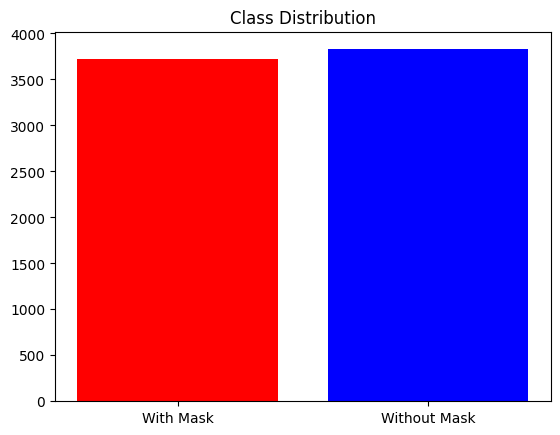

There are 3725 images with masks.
There are 3828 images without masks.


In [2]:
with_mask_files = os.listdir('data/with_mask')
without_mask_files = os.listdir('data/without_mask')

plt.bar(["With Mask", "Without Mask"], [len(with_mask_files), len(without_mask_files)], color=['red', 'blue'])
plt.title('Class Distribution')
plt.show()

print("There are {} images with masks.".format(len(with_mask_files)))
print("There are {} images without masks.".format(len(without_mask_files)))

Given these representation, we can verify that both sets of images are represented evenly. This ensures that the model will not be biased towards one category and will maintain fairness in its training.

**Example Images**

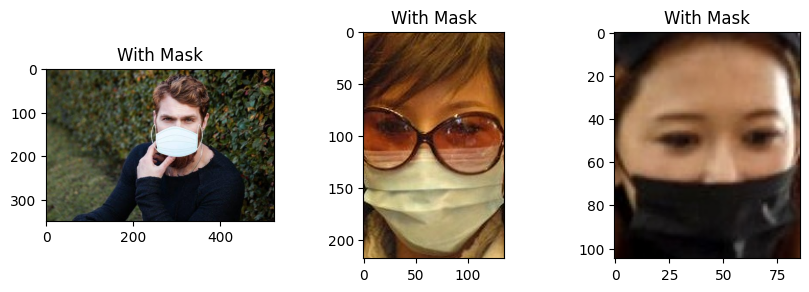

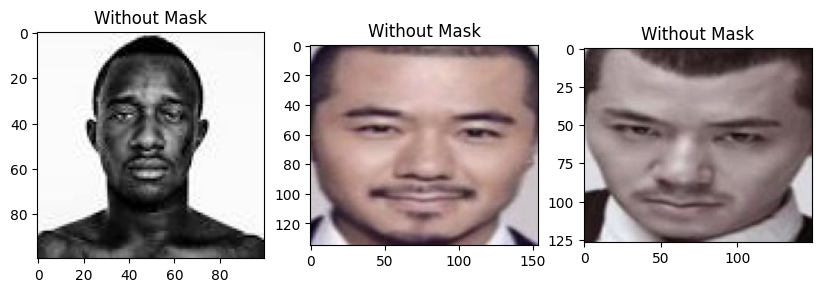

In [3]:
# Function to visualize sample images
def visualize_samples(folder_path, title, n=3):
    images = os.listdir(folder_path)[:n]
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
    plt.show()

visualize_samples("data/with_mask", "With Mask")
visualize_samples("data/without_mask", "Without Mask")

## 3. Data Preprocessing

### Image Loading & Transformations

In [4]:
with_mask_path = 'data/with_mask/'
without_mask_path = 'data/without_mask/'
data = []

# append the mask images first
for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128)) # resize the images
    image = image.convert('RGB') # convert the image to a color scale (for gray scaled image)
    image = np.array(image) # convert the image to np arrays
    data.append(image)

# append the mask off images after
for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128)) # resize the images
    image = image.convert('RGB') # convert the image to a color scale (for gray scaled image)
    image = np.array(image) # convert the image to np arrays
    data.append(image)

print("There are {} images with masks and {} images without masks or {} total images.".format(len(with_mask_files), len(without_mask_files), (len(with_mask_files) + len(without_mask_files))))
print("There are {} images in the data".format(len(data)))

c:\Users\Savin\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


There are 3725 images with masks and 3828 images without masks or 7553 total images.
There are 7553 images in the data


With this code, we place all images into one variable for easier training and testing set creation and check lengths to make sure all images were appended.

### Image Scaling

In [5]:
# scale on a range of 0-1 for easier neural network training
data = np.array(data) / 255.0

Neural Networks tend too perform better when data is on an equal scale.

### Label Creation
with mask --> 1 <br> without mask --> 0

In [6]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

# combining labels with masked images first
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


## 4. Train-Test Split

### X & Y Creation & Splitting

In [7]:
# creating x & y
X = data
y = np.array(labels)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

## 5. Model Architecture

### Choosing & Designing Model

In [8]:
num_of_classes = 2

model = keras.Sequential()
# ensure each image is in the correct format
model.add(keras.layers.Input(shape=(128, 128, 3)))
# helps detect lower level featureslike edges and patterns in the image
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
# reduces spacial size to help focus on other features
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# extract higher-level features from the output of the first convolutional layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# reduce the data to retain only the essential features
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# convert 2D features to 1D vector
model.add(keras.layers.Flatten())

# make decisions based on features
model.add(keras.layers.Dense(128, activation='relu'))
# disable 50% neurons to help prevent overfitting
model.add(keras.layers.Dropout(0.5))

# process the extracted features again for more accurate predictions
model.add(keras.layers.Dense(64, activation='relu'))
# disable 50% neurons to help prevent overfitting
model.add(keras.layers.Dropout(0.5))

# make the classification prediction
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Model Compilation & Training

### Model Compilation

In [10]:
# compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

**Loss Function:** sparse_categorical_crossentropy for multi-class classification.<br>
**Optimizer:** Adam optimizer for faster convergence.<br>
**Metrics:** Accuracy to measure model performance.

### Model Training

In [11]:
# call back function to stop if no progress would be made
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# train the model with 0 epochs
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, callbacks=[early_stopping])

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - acc: 0.6978 - loss: 0.6471 - val_acc: 0.8744 - val_loss: 0.3005
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - acc: 0.8816 - loss: 0.2932 - val_acc: 0.9190 - val_loss: 0.2299
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - acc: 0.9039 - loss: 0.2475 - val_acc: 0.9157 - val_loss: 0.2468
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - acc: 0.9120 - loss: 0.2229 - val_acc: 0.9174 - val_loss: 0.2294
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - acc: 0.9264 - loss: 0.1843 - val_acc: 0.9174 - val_loss: 0.2568
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - acc: 0.9382 - loss: 0.1478 - val_acc: 0.9256 - val_loss: 0.2146
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - acc: 0.9496 - loss: 0.1272 - val_acc: 0.9273 - val_loss: 0.2540
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - acc: 0.9531 - loss: 0.1214 - val_acc: 0.9223 - val_loss: 0.2535
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 

## 7. Model Evaluation & Results

### Evaluating on Test Set

In [12]:
_, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.9305 - loss: 0.1976
Test Accuracy =  0.9252150654792786


### Training Vs (Testing Loss & Accuracy)

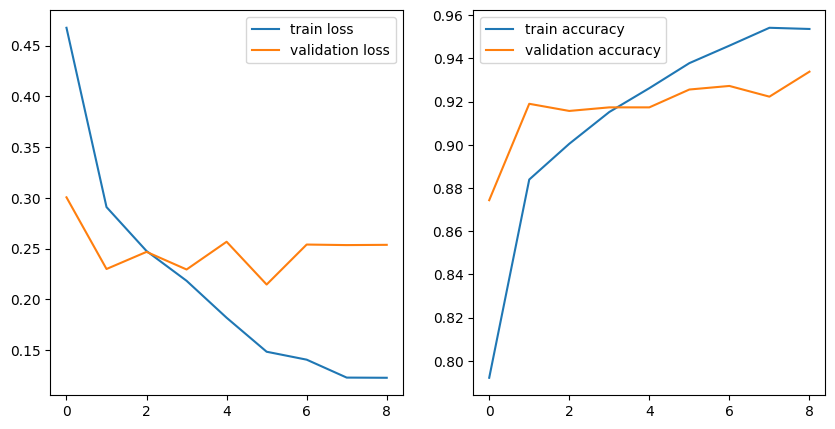

In [13]:
h = history

plt.figure(figsize=(10, 5))

# plot traing & validation lostt
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()

# plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


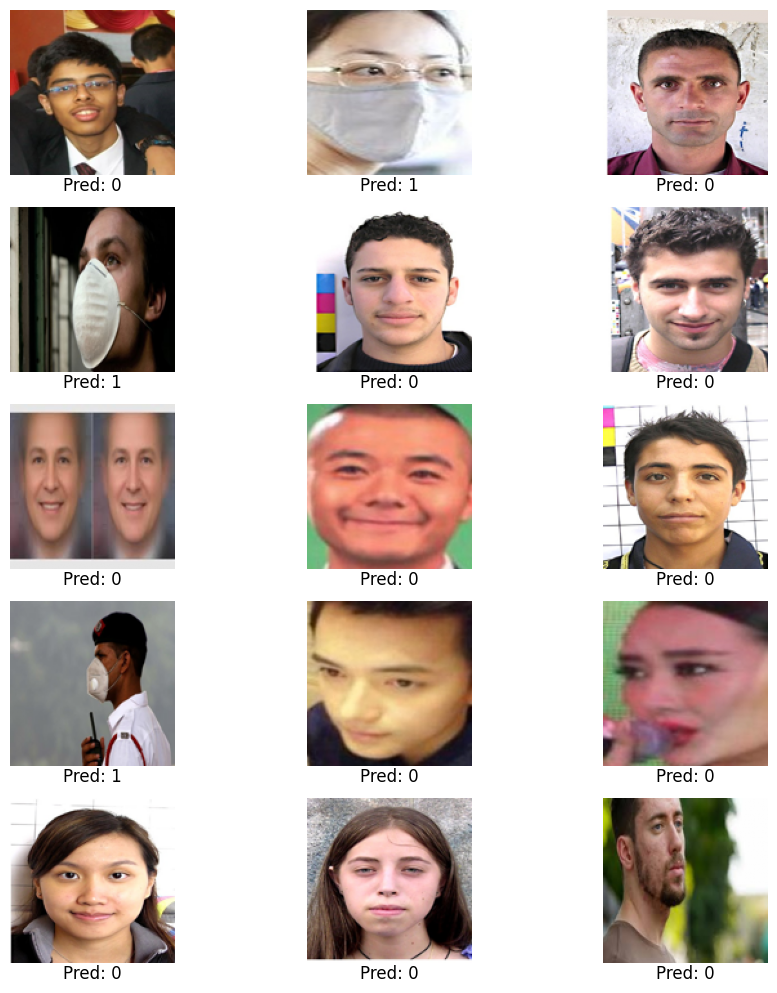

In [14]:
# create prediction labels for 15 test images
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(15): # in range of 15 images

    plt.subplot(5, 3, i + 1)
    plt.imshow(X_test[i]) # print image
    plt.axis('off') # hide ticks
    
    # place prediction text
    plt.text(0.5, -0.1, f"Pred: {predicted_labels[i]}", fontsize=12, ha='center', 
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


### Confusion Matrix

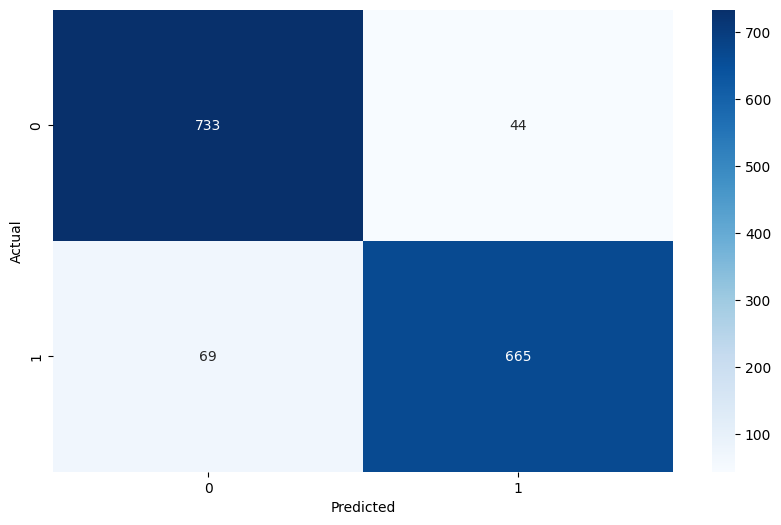

In [15]:
cm = confusion_matrix(y_test, predicted_labels) # create confusion matrix with predicted labels
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # plot confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Looking at this, it is clear to see that the model generally labels the images correctly with a high accruacy but also emphasises a possible bias in labeling as not wearing a mask over wearing.

## 8. Conclusion

### Summary of Findings

The Face Mask Detection model developed has a accuracy of 92.5% in it's ability to classify if a person is either wearing a mask or not. This indicates that it is successfully able to identify whether a person is wearing a mask based on different facial features. 

### Model Performance 

When comparing the training set and evaluation set, both reached a similar accuracy, this indicating that the model performed well to unseen daata. Additionally the loss curves showed smooth convergence confirming the model's stable performance. The confusion matrix also highlighted the model's reliaility in distinguishing between both classes.